

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Will load given data

housing_df = pd.read_csv('/content/drive/MyDrive/DataSets/Housing (2).csv')

housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [7]:
housing_df['MEDV'].mean()

22.532806324110677

In [8]:
housing_df['MEDV'].apply(lambda x: 1 if x > 23 else 0)

#df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: MEDV, Length: 506, dtype: int64

In [9]:
dependent_variable = 'MEDV'

independent_variables = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [10]:
X = housing_df[independent_variables]

y = housing_df[dependent_variable]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=324)

In [15]:
MEDV_classifier = DecisionTreeRegressor(max_leaf_nodes=10, random_state=324)
MEDV_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=324)

**Predict on Test Set**

In [17]:
y_predicted = MEDV_classifier.predict(X_test)

y_predicted[:10]

array([46.71875   , 21.35611511, 14.52653061, 14.52653061, 21.35611511,
       46.71875   , 21.35611511, 27.73658537, 14.52653061, 46.71875   ])

In [18]:
y_test[:10]

233    48.3
53     23.4
423    13.4
399     6.3
346    17.2
226    37.6
69     20.9
264    36.5
488    15.2
232    41.7
Name: MEDV, dtype: float64

**Measure Accuracy**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
mean_squared_error(y_test, y_predicted)


21.44551350292271

In [24]:
r2_score(y_test, y_predicted) * 100

75.06373540373467

**Visulaizing Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

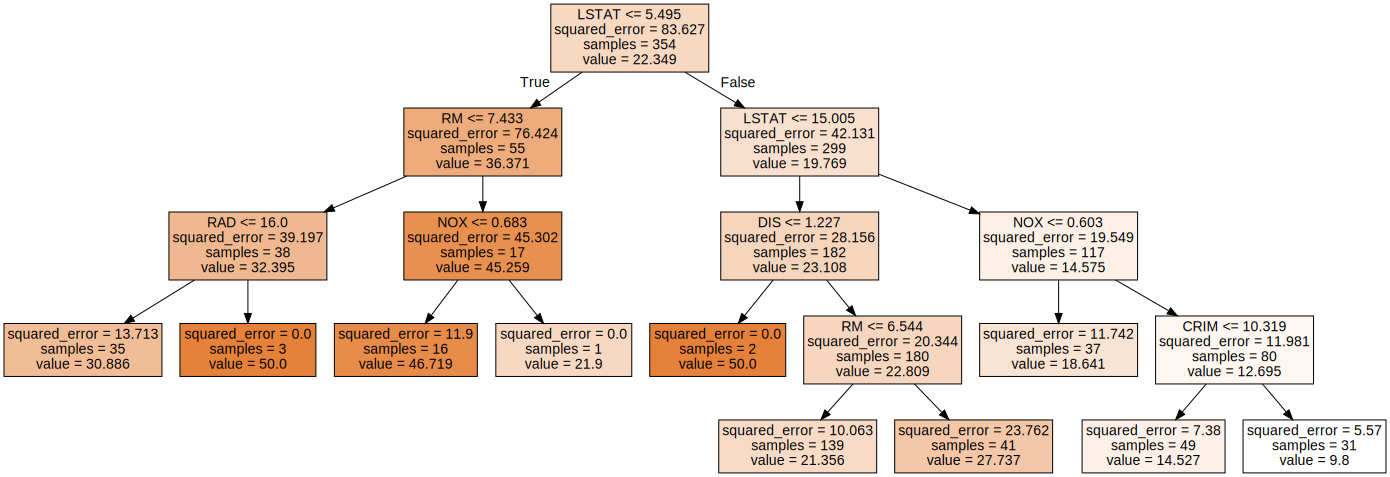

In [26]:
graph = Source(tree.export_graphviz(MEDV_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))